In [44]:
import pandas as pd
import numpy as np
import re
from vncorenlp import VnCoreNLP
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Khởi tạo VnCoreNLP
vncorenlp=VnCoreNLP("C:/Users/Admin/Documents/XU LY NGON NGU TU NHIEN HUST/Code/vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m')

# Từ điển viết tắt tiếng Việt
abbreviation_map = {
    "ko": "không",
    "hok": "không",
    "đc": "được",
    "ms": "mới",
    "j": "gì",
    "vl": "vãi lồn",
    "cmt": "comment",
    "đụ": "địt",
    "đmm": "địt mẹ mày",
    "dm": "địt mẹ",
    "đcm": "địt con mẹ",
    "dcm": "địt con mẹ",
    "cc": "con cặc",
    "nx": "nữa",
    "tks": "thanks",
    "r": "rồi",
    "fb": "facebook",
    "ey": "ơi",
    "ntn": "như thế nào",
    "uii": "ơi",
    "k": "không",
    "van hoa": "văn hóa",
    "qá": "quá",
    "ngỉ": "nghỉ",
    "đc": "được",
    "t": "tao",
    "m": "mày",
    "ib": "nhắn tin",
    "đt": "điện thoại",
    "mng": "mọi người",
    "mat dai": "mất dạy",
    "vs": "với",
    "vc": "vãi cứt",
    "vcl": "vãi cả lồn",
    "đ": "đéo",
    "Du me may": "Địt mẹ mày",
    "Đkm": "Địt con mẹ",
    "Đậu móa": "Địt mẹ",
    "ưii": "ơi",
    "XL": "xin lỗi",
    "xloi": "xin lỗi",
    "quanque": "quần què",
    "vch": "vãi chưởng",
    "D m": "Địt mẹ",
    "lày": "này",
    "xamlol": "xàm lồn",
    "vler": "vãi lồn",
    "Ĩ": "Đĩ",
    "thèng": "thằng",
    "đ ịt": "địt",
    "du me": "địt mẹ",
    "xạo lol": "xạo lồn",
    "mọe": "mẹ",
    "má": "mẹ",
    "mik": "mình",
    "vk": "vợ",
    "ck": "chồng",
    "vn": "việt nam",
    "nhà lướt": "nhà nước",
    "éo": "đéo",
    "cmn": "con mẹ nó",
    "cmnr": "con mẹ nó rồi",
    "l": "lồn",
    "cl": "cái lồn",
    "dume": "địt mẹ",
    "ổn lòi lìa": "ỉa lòi lồn",
    "dị trời": "vậy trời",
    "ạk": "ạ",
    # Thêm các từ khác nếu cần
}

In [46]:
# Hàm mở rộng viết tắt
def expand_abbreviations(text):
    words = text.split()
    words = [abbreviation_map.get(word.lower(), word) for word in words]
    return ' '.join(words)

In [47]:
# Hàm tiền xử lý văn bản
def preprocess_text(text):
    # Chuyển về chữ thường
    text = text.lower()
    # Loại bỏ ký tự đặc biệt
    text = re.sub(r"[^\w\s]", "", text)
    # Mở rộng viết tắt
    text = expand_abbreviations(text)
    # Tách từ bằng VnCoreNLP
    tokens = vncorenlp.tokenize(text)
    if tokens and tokens[0]:  # Kiểm tra nếu token không rỗng
        text = " ".join(tokens[0])
    else:
        text = ""  # Nếu không có token, trả về chuỗi rỗng
    return text


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load raw data
data = pd.read_csv('C:/Users/Admin/Documents/XU LY NGON NGU TU NHIEN HUST/Code/crawl comments from facebook/data/data2.csv', on_bad_lines='skip')  # Replace with your correct path

# Save raw data
data.to_csv('C:/Users/Admin/Documents/XU LY NGON NGU TU NHIEN HUST/Code/crawl comments from facebook/data/raw_data.csv', index=False)

# Preprocess the data
data['cleaned_description'] = data['Description'].apply(preprocess_text)

# Save processed data
data.to_csv('C:/Users/Admin/Documents/XU LY NGON NGU TU NHIEN HUST/Code/crawl comments from facebook/data/processed_data.csv', index=False)

# Split the data into train, test, and validation sets
X = data['cleaned_description']
y = data['Label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Save train, test, and validation sets
train_data = pd.DataFrame({'Description': X_train, 'Label': y_train})
test_data = pd.DataFrame({'Description': X_test, 'Label': y_test})
val_data = pd.DataFrame({'Description': X_val, 'Label': y_val})

train_data.to_csv('C:/Users/Admin/Documents/XU LY NGON NGU TU NHIEN HUST/Code/crawl comments from facebook/data/train_data.csv', index=False)
test_data.to_csv('C:/Users/Admin/Documents/XU LY NGON NGU TU NHIEN HUST/Code/crawl comments from facebook/data/test_data.csv', index=False)
val_data.to_csv('C:/Users/Admin/Documents/XU LY NGON NGU TU NHIEN HUST/Code/crawl comments from facebook/data/val_data.csv', index=False)


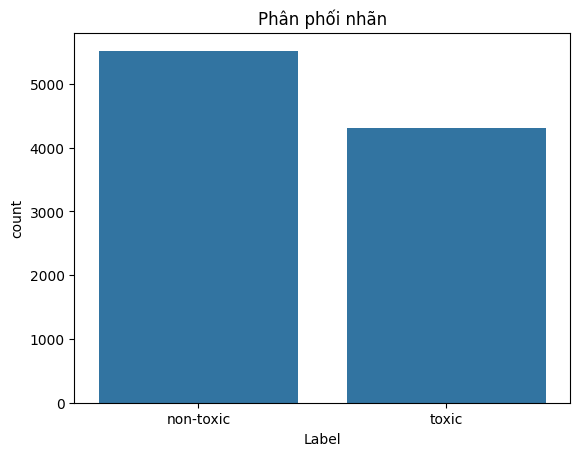

In [49]:
sns.countplot(x='Label', data=data)
plt.title("Phân phối nhãn")
plt.show()

In [50]:
# Initialize a TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform it
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [51]:
# Make predictions using the trained model
y_pred = log_model.predict(X_test_tfidf)

# Print evaluation metrics
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8570460704607046
Classification Report:
               precision    recall  f1-score   support

   non-toxic       0.84      0.93      0.88       848
       toxic       0.89      0.75      0.82       628

    accuracy                           0.86      1476
   macro avg       0.87      0.84      0.85      1476
weighted avg       0.86      0.86      0.85      1476



In [52]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['cleaned_description'])
X_seq = tokenizer.texts_to_sequences(data['cleaned_description'])
X_padded = pad_sequences(X_seq, maxlen=100)
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_padded, y, test_size=0.2, random_state=42)


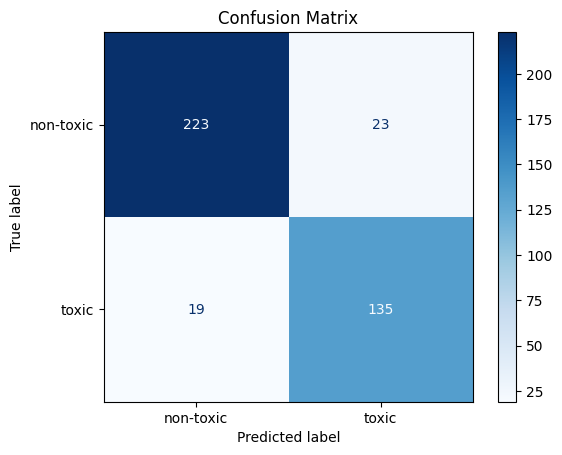

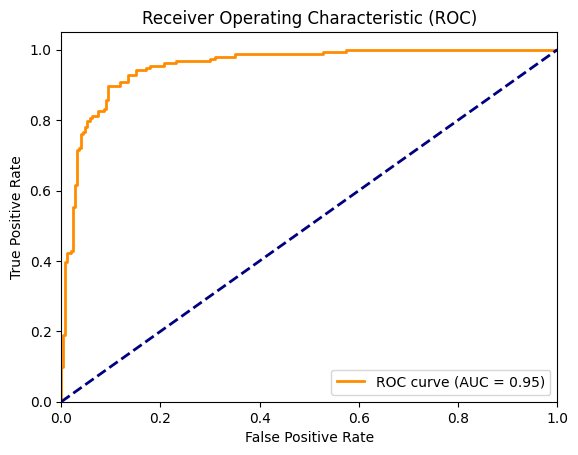

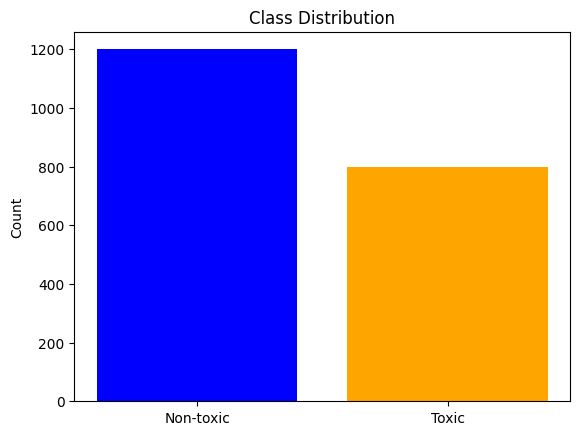

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate synthetic dataset for demonstration
X, y = make_classification(n_samples=2000, n_features=20, n_classes=2, weights=[0.6, 0.4], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["non-toxic", "toxic"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 2. ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# 3. Class Distribution
unique, counts = np.unique(y, return_counts=True)
plt.bar(unique, counts, color=['blue', 'orange'])
plt.xticks([0, 1], ['Non-toxic', 'Toxic'])
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [54]:
# Ví dụ câu mới để kiểm tra
new_text = "địt con mẹ"

# Tiền xử lý câu mới
new_text_cleaned = preprocess_text(new_text)

# Chuyển câu thành tf-idf
new_text_tfidf = vectorizer.transform([new_text_cleaned]).toarray()  # Sử dụng vectorizer đã học để chuyển đổi

# Dự đoán với mô hình Logistic Regression
prediction = log_model.predict(new_text_tfidf)  # Dự đoán với mô hình đã huấn luyện

print(f"Prediction: {prediction[0]}")  # In ra 0 hoặc 1


Prediction: toxic


In [55]:
# Loại bỏ các hàng có giá trị NaN trong cột 'Description'
test_data = test_data.dropna(subset=['Description'])

# Chuyển đổi cột 'Description' thành TF-IDF vector
test_tfidf = vectorizer.transform(test_data['Description'])

# Dự đoán nhãn cho các câu
test_data['Predicted_Label'] = log_model.predict(test_tfidf)

# Lưu kết quả dự đoán vào file CSV mới
output_file_path = 'C:/Users/Admin/Documents/XU LY NGON NGU TU NHIEN HUST/Code/crawl comments from facebook/data/test_predictions.csv'
test_data.to_csv(output_file_path, index=False)

print(f"Dự đoán đã được lưu vào: {output_file_path}")


Dự đoán đã được lưu vào: C:/Users/Admin/Documents/XU LY NGON NGU TU NHIEN HUST/Code/crawl comments from facebook/data/test_predictions.csv
